# Data Vis for the Active Learning

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [2]:

df_p5x5 = pd.read_csv("p++5x5.csv")
df_p10x12 = pd.read_csv("p++10x12.csv")

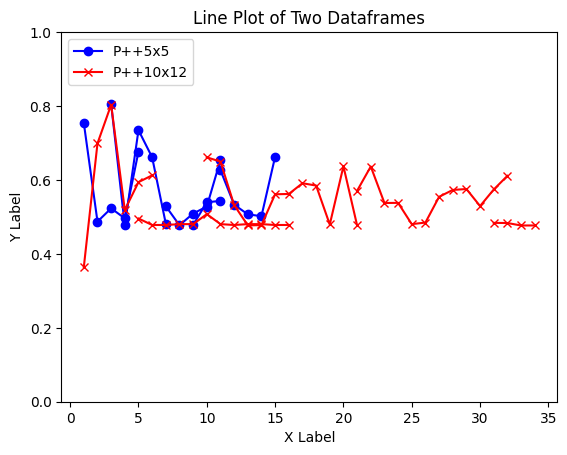

In [3]:
fig, ax = plt.subplots()

df_p5x5.plot(kind='line', x='P++5x5', y=[1, 2, 3, 4, 5], marker='o', color='blue', ax=ax)
df_p10x12.plot(kind='line', x='P++10x12', y=[1, 2, 3, 4, 5], marker='x', color='red', ax=ax)

plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Line Plot of Two Dataframes')

ax.set_ylim([0, 1])  # Set the y-axis limits

# Create custom legends for each DataFrame
lines, labels = ax.get_legend_handles_labels()
p5x5_legend = plt.Line2D([], [], color='blue', marker='o', label='P++5x5')
p10x12_legend = plt.Line2D([], [], color='red', marker='x', label='P++10x12')
plt.legend(handles=[p5x5_legend, p10x12_legend], loc='upper left', frameon=True)

plt.show()

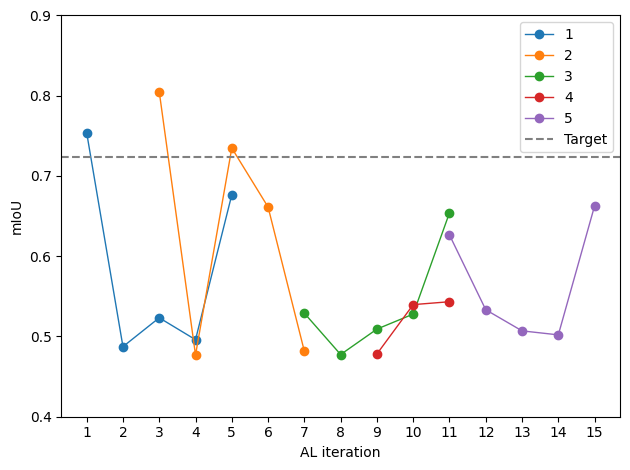

In [4]:
df_p5x5.plot(kind='line', x='P++5x5', y=[1, 2, 3, 4, 5], marker='o', linewidth=1)
plt.xlabel('AL iteration')
plt.ylabel('mIoU')
plt.ylim([0.4, .9])  # Set the y-axis limits

plt.axhline(y=0.724, color='gray', linestyle='--', label='Target') # Add horizontal line at 0.724 and label it

plt.legend() # Show the legend
plt.xticks(np.arange(df_p5x5.shape[0])+1) # Show every label on the x-axis

plt.tight_layout()
plt.show()

<Axes: xlabel='P++10x12'>

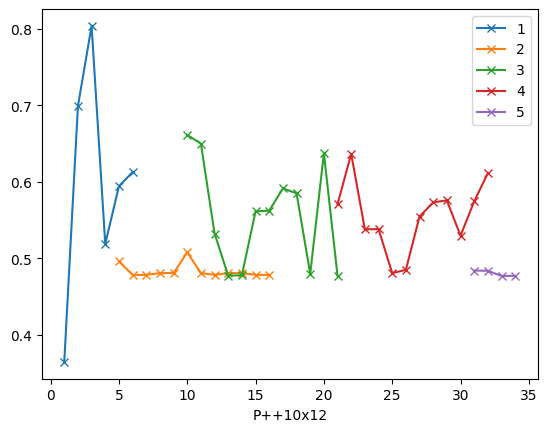

In [5]:
df_p10x12.plot(kind='line', x='P++10x12', y=[1, 2, 3, 4, 5], marker='x')

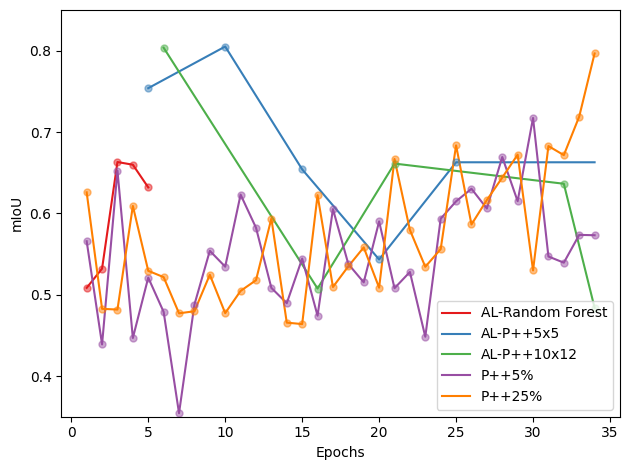

In [15]:
df_al_results_interpolated = pd.read_csv("al_results_interpolated.csv")
df_al_results = pd.read_csv("al_results.csv")

y = ["AL-Random Forest","AL-P++5x5","AL-P++10x12","P++5%","P++25%"]
ax = df_al_results_interpolated.plot(x="Epochs", y=y, linewidth=1.5)

# Define a color palette for the lines and markers
colors = matplotlib.colormaps["Set1"](range(len(y)))

for i, col in enumerate(y):
    df_al_results.plot(
        x="Epochs",
        y=col,
        marker="o",
        markersize=5,
        linestyle="None",
        ax=ax,
        color=colors[i],
        alpha=0.5,
    )
    ax.lines[i].set_color(colors[i])

plt.xlabel("Epochs")
plt.ylabel("mIoU")
plt.ylim([0.35, .85])  # Set the y-axis limits

# Create a custom legend with one entry per series, ordered by y
handles, labels = ax.get_legend_handles_labels()
order = [labels.index(label) for label in y]
plt.legend(
    [handles[i] for i in order],
    [labels[i] for i in order],
    loc="lower right",
    frameon=True,
)
# # Create a custom legend with one entry per series
# handles, labels = ax.get_legend_handles_labels()
# unique_labels = list(set(labels))
# unique_handles = [handles[labels.index(label)] for label in unique_labels]
# plt.legend(unique_handles, unique_labels, loc="lower right", frameon=True)

plt.tight_layout()
plt.savefig("al_results_interpolated_short-y-axis.pdf")
plt.show()
